# Running SAS within Python with SASpy

[SAS](https://www.sas.com/en_gb/training/courses/sas-programming.html) is a proprietary programming language specialized in statistical analysis that is widely used in Clinical Research. However, SAS is not a first-choice programming language in Data Science or Scientific Computing. Instead, these areas are dominated by the open-source programming languages Python and R. which contain numerous packages designed to analyze and visualize datasets. Integrating SAS in Python pipelines and Jupyter Notebooks could thus facilitate the analysis and communication of results in Clinical Research between teams with diverse technical backgrounds, plus benefit from the power of both languages.

Luckily, several projects are building bridges between Python and SAS. This is the case of [SASpy](https://sassoftware.github.io/saspy/), an awesome, ongoing, project which enables easy integration of SAS in Python and Jupyter Notebooks.

In this notebook, I'll show you how to set up SASpy in Jupyter so you can enjoy the benefits of SAS alongside those of Python.

## Setting up SASpy

You will need valid SAS credentials to start using SASpy. Here, we will use SAS's [On Demand for Academics](https://www.sas.com/en_us/software/on-demand-for-academics.htm) (ODA) license, which allows you to use SAS for free in the browser or, as in this case, through SASpy. You can sign up [here](https://welcome.oda.sas.com/), remember to take note of your user ID and password, you will need them later on.

Once you have signed up, you need to download a zip file containing additional jar files required to establish the connection between SASpy and ODA. You can obtain these [here](https://support.sas.com/downloads/package.htm?pid=2494#) (I have not automated downloading because it requires you to agree on SAS usage terms).

Alright, now we are ready to install SASpy. Detailed instructions on how to install SASpy and on how to establish a connection to ODA can be found [here](https://support.sas.com/ondemand/saspy.html). I have also made an installation script for those of you who are installing SASpy on a GNU/Linux machine. To use it, just follow these steps:

1. Install conda environment with SASpy and required dependencies:
```bash
conda create env -f saspy/env.yml
```

2. Activate environment:
```bash
conda activate saspy
```

3. Run installation script:
```bash
python saspy/initialize_saspy.py \
  --zip "path_to_zip" \
  --region "mirror_region" \
  --user "ODA_user_ID" \
  --password "ODA_password
```
Where you have to indicate the path to the downloaded zip containing additional jar files, the ODA mirror region: either US 1, US 2, Europe, Asia 1 or Asia 2, and your ODA user name and password.

Alright, now you are ready to use SASpy in Python. Let's begin by importing the required libraries and starting a SAS session:

In [1]:
import saspy
import pandas as pd
import numpy as np


sas = saspy.SASsession()
sas.teach_me_SAS(nosub=False) # set to True to show SAS code
sas

Using SAS Config named: oda
SAS Connection established. Subprocess id is 10316



Access Method         = IOM
SAS Config name       = oda
SAS Config file       = /home/robaina/miniconda3/envs/saspy/lib/python3.11/site-packages/saspy/sascfg_personal.py
WORK Path             = /saswork/SAS_work062B000104DD_odaws01-euw1.oda.sas.com/SAS_work4CB6000104DD_odaws01-euw1.oda.sas.com/
SAS Version           = 9.04.01M7P08062020
SASPy Version         = 4.5.0
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 66781


## Running some basic statistics

Now that we have installed SASpy and initialized our SAS session we can start running some basic statistics.


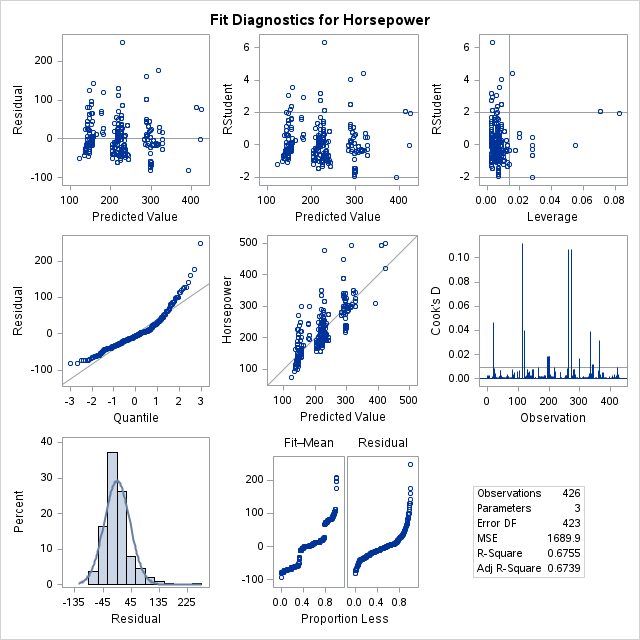

In [2]:
stat = sas.sasstat()
cars = sas.sasdata('cars','sashelp', dsopts={'drop':"origin wheelbase length weight"})
stat_results = stat.reg(model='horsepower = Cylinders EngineSize',data=cars)
stat_results.DIAGNOSTICSPANEL

And that's it. You can now use SASpy to run SAS commands in Python! 

SASpy provides a [API](https://sassoftware.github.io/saspy/api.html) on its own to run the most common SAS commands. However, you can also run any SAS command by using the `sas.submitLST()` method of the sas session object. However, if you are running saspy in Jupyter, like here, you can use the Jupyter Magic ```%%SAS``` to directly run SAS commands in the cell. Note that you can pass  the initialized sas session object to the magic as a parameter:


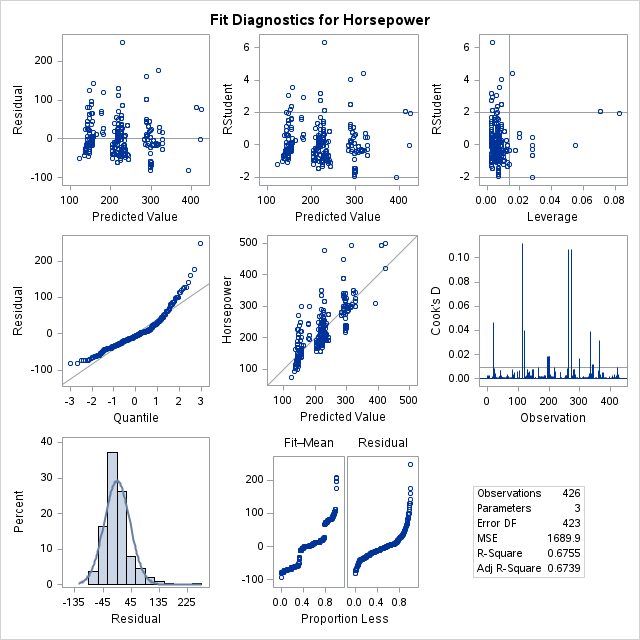
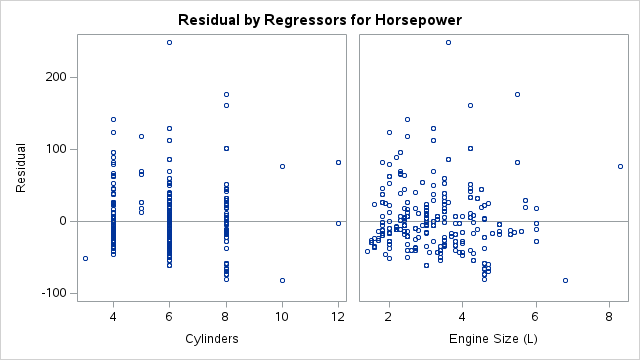

In [3]:
%%SAS sas

data cars;
  set sashelp.cars;
  drop origin wheelbase length weight;
run;

proc reg data=cars
  plot=DIAGNOSTICS;
  model horsepower=Cylinders EngineSize;
run;

Additional Jupyter magic commands are available for SASpy. You can check them out [here](https://sassoftware.github.io/saspy/advanced-topics.html#jupyter-magics).

## Integrating Pandas dataframes in SAS

I extensively use [pandas](https://pandas.pydata.org/) for data manipulation and quick visualization in Python. Fortunately, SASpy makes it easy to interconvert pandas data frames and SAS tables. Here is an example:

In [4]:
cars_df = sas.sd2df('cars','sashelp', dsopts={'drop':"origin wheelbase length weight"})
cars_df.head()

,Make,Model,Type,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway
0,Acura,MDX,SUV,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0
1,Acura,RSX Type S 2dr,Sedan,Front,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0
2,Acura,TSX 4dr,Sedan,Front,26990.0,24647.0,2.4,4.0,200.0,22.0,29.0
3,Acura,TL 4dr,Sedan,Front,33195.0,30299.0,3.2,6.0,270.0,20.0,28.0
4,Acura,3.5 RL 4dr,Sedan,Front,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0


We can also initialize a SAS table from a pandas dataframe like this:

In [5]:
cars = sas.df2sd(cars_df)
cars

Libref  = WORK
Table   = _df
Dsopts  = {}
Results = Pandas

You can find additional usage examples in the [SASpy examples](https://github.com/sassoftware/saspy-examples) repository.

## Concluding remarks

I hope you have found this brief tutorial useful. I think that SASpy is a great tool to integrate SAS in Python pipelines, as well as to facilitate reporting of the results in Jupyter Notebooks. This combination could greatly improve how data is analyzed and presented in Clinical Research. I hope that this tutorial has helped you to get started with SASpy. If you have any questions or suggestions, please feel free to open an [issue](https://github.com/Robaina/clinical-research-tutorials/issues)!